# Jupyter Notebook
Jupyter Notebook - веб приложение для интерактивных вычислений. Для его запуска необходимо в консоли перейти в нужную папку и выполнить команду `jupyter notebook`. После этого откроется веб страница, где будут отображаться файлы той директории, откуда была запущена команда. Файлы jupyter, которые также называются тетрадями, имеют расширение **ipynb**. При нажатии на такой файл он открывается в интерактивном режиме.

Каждый отдельный файл представляет веб страницу, которая состоит из ячеек. Каждая ячейка может быть двух видов: 1. Markdown  или 2. Code.

### Ячейка Markdown
Как можно догадаться из названия в Markdown ячейках можно создавать текст в [markdown формате](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html). Поддерживаются различные способы форматирования, которые можно посмотреть по ссылке или в материалах данного курса. Текст, который вы сейчас читаете, также находится в markdown ячейке.

Кроме форматирования текста также поддерживается возможность создания математических формул с помощью LaTex. Формулу можно встроить в текст (например, $e^{i\pi}=-1$) или создать в отдельной строке:

$$e^x=\sum_{k=0}^\infty \frac{x^k}{k!}$$

Для редактирования текста в markdown ячейке необходимо два раза кликнуть по ней.

### Ячейка Code
Следующая ячейка является Code ячейкой и в ней можно писать код и выполнять его. Для выполнения кода необходимо нажать **Ctrl + Enter** (выполнить и остаться в текущей ячейке) или **Shift + Enter** (выполнить и перейти в следующую ячейку)

In [1]:
import numpy as np

Если последняя строка кода возвращает какое нибудь значение, то оно отображается сразу после ячейки

In [2]:
np.random.rand(10)

array([ 0.00785357,  0.4145793 ,  0.32054238,  0.4905349 ,  0.21768026,
        0.56122227,  0.87430789,  0.58248162,  0.29214826,  0.75075692])

### Автодополнение и работа с документацией
Для автодополнения можно использовать клавишу `<TAB>` после точки или внутри скобки при вызове функции. При этом выйдет список доступных вариантов, которые можно выбрать, чтобы автоматически дополнить код. Можете попробовать автодополнение поставив курсор после `np.random.<TAB>`.

В Jupyter есть несколько способов получить документацию. Первый способ это использовать сочетание клавиш **Shift+Tab**. Второй способ поставить знак `?` после необходимого модуля

In [3]:
np?

### Magic команды
Jupyter поддерживает набор так называемых "волшебных" (magic) комманд. Это разные полезные комманды, которые не являются чстью python. Все эти команды начинаются на %.
Например, ниже приведен пример команды `%run`, которая выполняет внешний python код

In [4]:
%run code/magic_example.py

1764


Можно также напрямую загрузить содержимое внешнего файла в ячейку с помощью команды `%load`

In [5]:
%load code/magic_example.py

1764


Из полезных комманд также можно отметить команду `%timeit`, которая выполняет код много раз и выводит среднее время выполнения кода 

In [6]:
%timeit L = [n ** 2 for n in range(1000)]

1000 loops, best of 3: 282 µs per loop


Список всех magic команд можно посмотреть отдельной командой `%lsmagic`.
### Работа с графикой
В python есть много библиотек для визуализации данных. Многие из них интегрируются с Jupyter и отображают графики

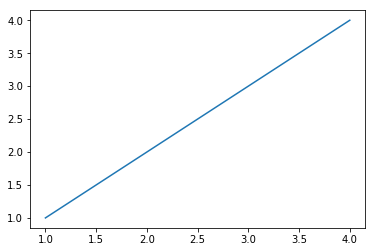

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([1, 4], [1, 4])

или несколько графиков

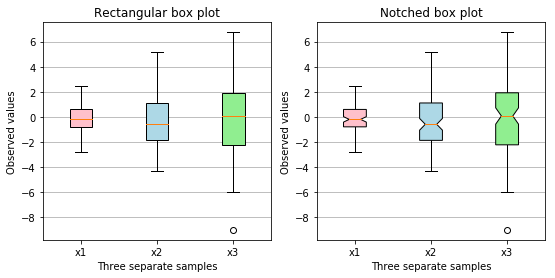

In [8]:
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = axes[0].boxplot(all_data,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[0].set_title('Rectangular box plot')

# notch shape box plot
bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[1].set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

или трехмерную графику

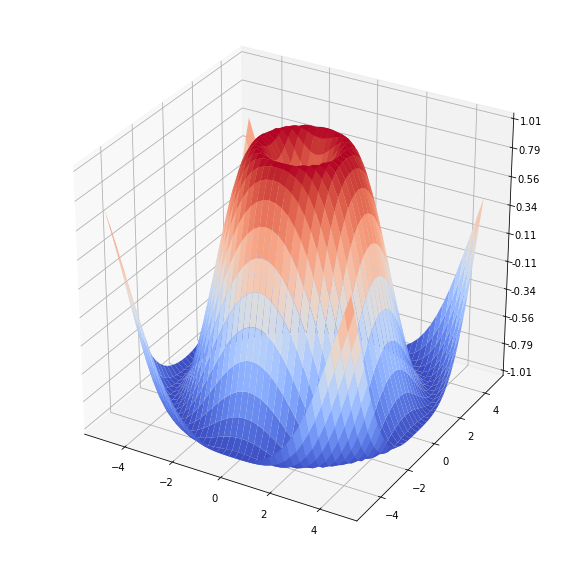

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


### Другие возможности
Для Jupyter Notebook созданы большое количество плагинов. Например, можно встраивать видео из youtube:

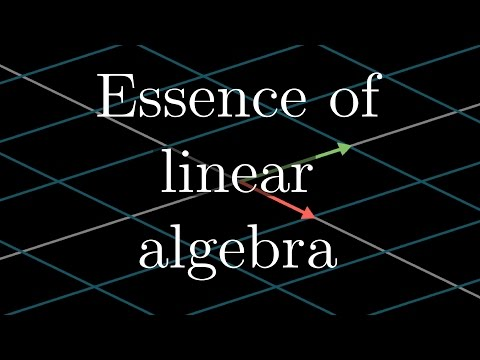

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo('kjBOesZCoqc')

Или интерактивные карты (данная ячейка отобразится только если у вас установлен [folium](https://github.com/python-visualization/folium). Если у вас ничего не отображается, то можете пропустить данный пример, он дальше не понадобится)

In [11]:
import folium
m = folium.Map(zoom_start=12, location=[41.3161, 69.2915])
m

Или встроить любой другой кусок HTML с помощью magic команды `%%html`. Ниже приведен пример встраивания твиттер

In [12]:
%%html
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Replace &quot;AI&quot; with &quot;matrix multiplication &amp; gradient descent&quot; in the calls for &quot;government regulation of AI&quot; to see just how absurd they are</p>&mdash; Ben Hamner (@benhamner) <a href="https://twitter.com/benhamner/status/892136662171504640?ref_src=twsrc%5Etfw">July 31, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


### Горячие клавишы
Многие действия можно выполнить с помощью горячих клавиш. Список горячих клавиш можно найти в меню *Help - Keyboard shortcuts*.
Ниже приведен список наиболее полезных сочетаний:

| Ключ           | Описание                                                 |
|----------------|----------------------------------------------------------|
|  Esc           | выйти из режима редактирования и выделить текущую ячейку |
|  Enter         | перейти в режим редактирования ячейки текущей ячейки     |
|  Ctrl+S, S     | файл сохранить                                           |
|  Ctrl+Enter    | выполнить код и остаться в текущей ячейке                |
|  Shift + Enter | выполнить код и перейти в следующую ячейку               |
|  Shift + Tab   | выводит всплывающее окно с документацией                 |
|  a             | добавить ячейку сверху (above)                           |
|  b             | добавить ячейку снизу  (below)                           |
|  c             | скопировать ячейку                                       |
|  v             | вставить скопированную ячейку                            |
|  dd            | удалить ячейку                                           |
|  z             | отмена последнего действия                               |